In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)
import collections 
pip install plotly
pip install spotipy

In [4]:
sp = spotipy.Spotify()
        
cid = "a74491a1b2f8464db1b137e4c7c22f58"
csec = "4ca4c98d3746424aa1c2653e0b0ef5e6"


client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=csec)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

user_id = "rhearox99"

In [5]:
kanye_uri = 'spotify:artist:5K4W6rqBFWDnAN6FQUkS6x'
results = sp.artist_albums(kanye_uri, album_type='album')
albums = results['items']

while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

album_names=[]
for album in albums:
    album_names.append(album['name'])
list(dict.fromkeys(album_names))

['JESUS IS KING',
 'KIDS SEE GHOSTS',
 'ye',
 'The Life Of Pablo',
 'Yeezus',
 'Kanye West Presents Good Music Cruel Summer',
 'Watch The Throne (Deluxe)',
 'Watch The Throne',
 'My Beautiful Dark Twisted Fantasy',
 '808s & Heartbreak',
 'Graduation (French Limited Version)',
 'Graduation',
 'Graduation (Exclusive Edition)',
 'Graduation (Alternative Business Partners)',
 'Late Orchestration',
 'Late Registration',
 'The College Dropout']

In [6]:
sp.user(user='rhearox99')

{'display_name': 'rhearox99',
 'external_urls': {'spotify': 'https://open.spotify.com/user/rhearox99'},
 'followers': {'href': None, 'total': 5},
 'href': 'https://api.spotify.com/v1/users/rhearox99',
 'id': 'rhearox99',
 'images': [],
 'type': 'user',
 'uri': 'spotify:user:rhearox99'}

In [7]:
playlist = sp.user_playlist_tracks(user=user_id, playlist_id = '37i9dQZF1EpycW6RHg64Ph')

In [8]:
song = playlist['items'][0]['track']['uri']
sp.audio_features(song)[0]


{'danceability': 0.678,
 'energy': 0.438,
 'key': 9,
 'loudness': -8.847,
 'mode': 0,
 'speechiness': 0.0577,
 'acousticness': 0.29,
 'instrumentalness': 0,
 'liveness': 0.0838,
 'valence': 0.501,
 'tempo': 81.498,
 'type': 'audio_features',
 'id': '1opARDDYaOeE1QUdwXmBGu',
 'uri': 'spotify:track:1opARDDYaOeE1QUdwXmBGu',
 'track_href': 'https://api.spotify.com/v1/tracks/1opARDDYaOeE1QUdwXmBGu',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1opARDDYaOeE1QUdwXmBGu',
 'duration_ms': 247546,
 'time_signature': 4}

In [9]:
features= ['danceability','energy', 'loudness', 'speechiness', 'liveness', 'valence']
def df_user_playlist(userid, playlistid):
    playlist = sp.user_playlist_tracks(user=userid, playlist_id = playlistid)
    song_ids = []
    song_name = []
    artist = []
    for item in playlist['items']:
        song_name.append(item['track']['name'])
        song_ids.append(item['track']['uri'])
    dance = []
    energy=[]
    loudness=[]
    speechiness =[]
    liveness =[]
    valence=[]
    for song in song_ids:
        dance.append(float(sp.audio_features(song)[0]['danceability']))
        energy.append(float(sp.audio_features(song)[0]['energy']))
        loudness.append(float(sp.audio_features(song)[0]['loudness']))
        speechiness.append(float(sp.audio_features(song)[0]['speechiness']))
        liveness.append(float(sp.audio_features(song)[0]['liveness']))
        valence.append(float(sp.audio_features(song)[0]['valence']))
        
    data = {'song_name':song_name,'danceability': dance, 'energy': energy, 'loudness' :\
            loudness, 'speechiness':speechiness,'liveness':liveness, 'valence':valence}
    return pd.DataFrame(data)

    

In [10]:
playlist1 = df_user_playlist('rhearox99','37i9dQZF1EpycW6RHg64Ph' )
playlist2 = df_user_playlist('rhearox99','37i9dQZF1EpUtm5lDWFgib' )
playlist3 = df_user_playlist('Srivarshini','37i9dQZF1EpzO9zILKj4kw' )
top_50 = df_user_playlist('Srivarshini','37i9dQZEVXbLRQDuF5jeBp' )

In [143]:
top_50 = df_user_playlist('Srivarshini','37i9dQZEVXbLRQDuF5jeBp' )

In [11]:
def graph_playlist(playlist):
    colors = ['#00ccff', '#00cc99', '#ff9966', "#ff6699", '#ff0000', '#9966ff']
    fig, ax = plt.subplots(len(features),1,figsize=(50,50))
    feature = 0
    color = 0
    for a in ax:
        
        a.bar(x=playlist['song_name'], width = .8, color = colors[color], \
              height=playlist[features[feature]].sort_values(ascending=True))
        mean = playlist[features[feature]].mean()
        y = [mean for _ in range(len(playlist['song_name']))]
        a.plot(playlist['song_name'], y, color='#000000', linewidth=4.5)
        a.set_title(features[feature].capitalize() + ' in Playlist', fontsize=40)
        a.set_ylabel(features[feature].capitalize(), fontsize=28)
        a.set_xlabel('Songs', fontsize=28)
        a.set_xticklabels([])
        for tick in a.get_yticklabels():
                tick.set_fontsize(20)
        feature+=1
        color+=1



    
    

In [133]:
pts1 = []
pts2 = []
def graph_2_playlist(playlist1, playlist2):
    colors1 = ['#00ccff', '#00cc99', '#ff9966', "#ff6699", '#ff0000', '#9966ff']
    colors2 = ['#ccf5ff','#ccfff2','#ffccb3','#ffb3cc', '#ff8080', '#ccb3ff']
    color1 =0 
    color2=0
    for f in features:
        mean1 = playlist1[f].mean()
        mean2 = playlist2[f].mean()
        
        pts1.append(mean1)
        pts2.append(mean2)

        data = [
            go.Bar(x=playlist1.index, y=playlist1[f].sort_values(ascending=True), name='Playlist 1',\
                   marker_color = colors1[color1],   
                    #base=0
                   ),
            go.Bar(x=playlist2.index, y=playlist2[f].sort_values(ascending=True), name='Playlist 2',\
                   marker_color = colors2[color2],  
                   #base=0,
                   #width=0.5
                  )
        ]
        x = go.Figure().add_shape(
            # Line Horizontal
            go.layout.Shape(
                type="line",
                x0=0,
                y0=mean1,
                x1=30,
                y1=mean1,
                line=dict(
                    color="LightSeaGreen",
                    width=4,
                    dash="dashdot",
                ),
        )).update_shapes(dict(xref='x', yref='y'))



        layout = go.Layout(
            barmode='group',
        )



        fig = go.Figure(data=data,layout = layout)
        fig.add_shape(
            go.layout.Shape(
                type="line",
                x0=-1,
                y0=mean1,
                x1=30,
                y1=mean1,
            ))
        fig.add_shape(
            go.layout.Shape(
                type="line",
                x0=-1,
                y0=mean2,
                x1=30,
                y1=mean2,
            ))
        fig.update_layout(
            title= f.capitalize() + " in Playlist 1 vs Playlist 2",
            xaxis_title= "Songs",
            yaxis_title=f.capitalize(),
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#000000"
            )
        )


            
        iplot(fig, show_link=False)



        color1+=1
        color2+=1

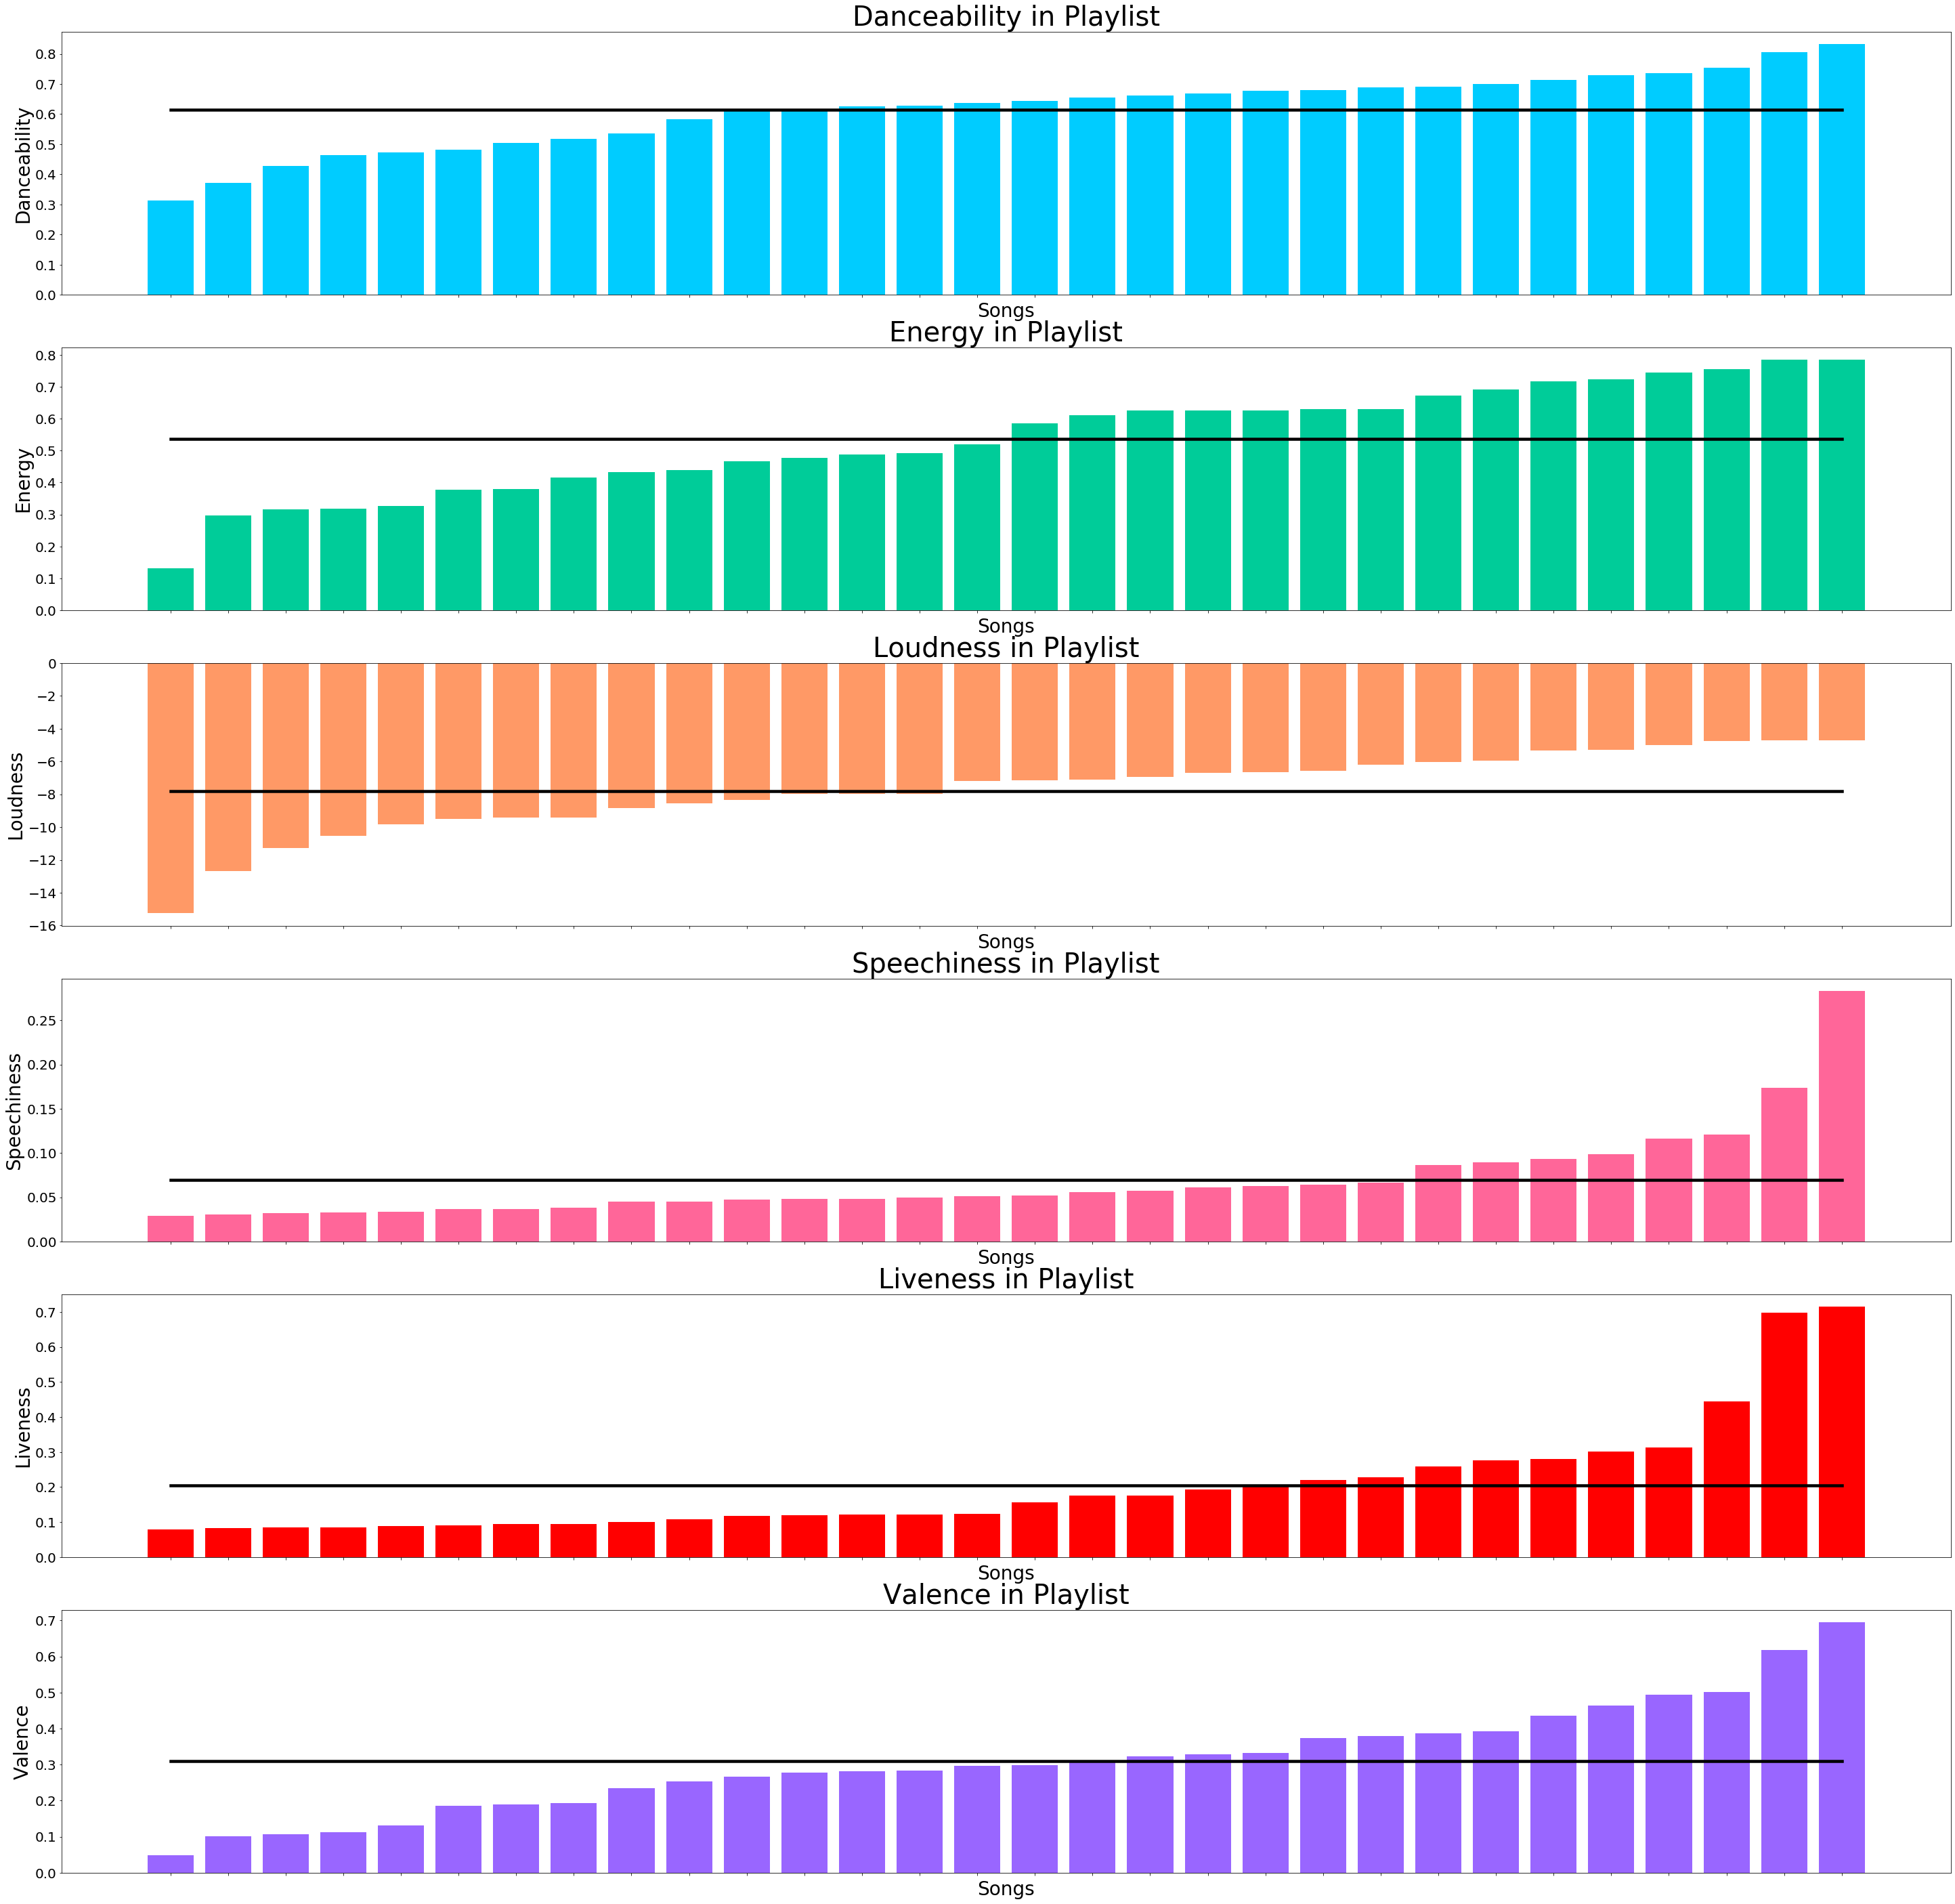

In [134]:
graph_2_playlist(playlist1, playlist2)
graph_playlist(playlist1)


In [33]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2,3], [1, 4,5], [1, 0,7],[10, 2,1], [10, 4,3], [10, 0,2]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
#kmeans.predict([[0, 0], [12, 3]])


array([1, 1, 1, 0, 0, 0], dtype=int32)

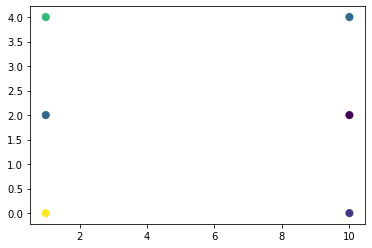

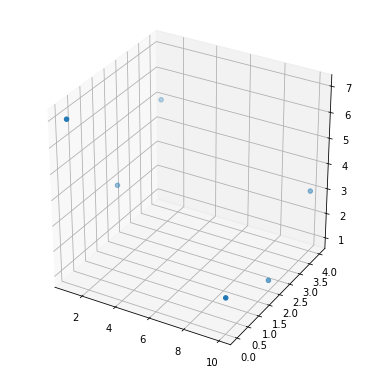

In [34]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=X[:,2]);
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [35]:
 ['danceability','energy', 'loudness', 'speechiness', 'liveness', 'valence']
X = playlist1.apply(lambda row: [row.danceability,row.energy,row.loudness, row.speechiness, row.liveness,\
                                  row.valence ], axis=1)
X = [x for x in X]
X =np.array(X)

XX = playlist2.apply(lambda row: [row.danceability,row.energy,row.loudness, row.speechiness, row.liveness,\
                                  row.valence ], axis=1)
XX = [x for x in XX]
XX =np.array(XX)


#plt.scatter(X[:, 0], X[:, 1],X[:, 2], X[:, 3], X[:, 4], X[:, 5]);

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.predict(XX)

array([2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

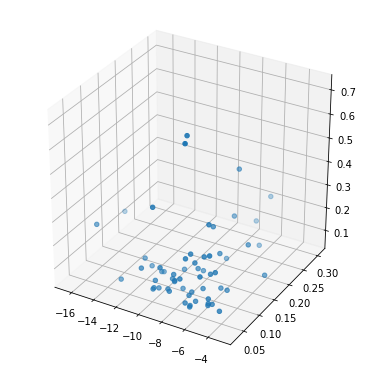

In [36]:
xxx = np.concatenate((X, XX), axis=0)


fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)

ax.scatter(xxx[:, 2], xxx[:, 3], xxx[:, 4])


In [38]:
>>> from sklearn import metrics
>>> from sklearn.metrics import pairwise_distances
>>> from sklearn import datasets

kmeans = KMeans(n_clusters=3, random_state=0).fit(xxx)
>>> labels = kmeans.labels_
print(collections.Counter(kmeans.predict(XX)))
print(collections.Counter(kmeans.predict(X)))
>>> metrics.silhouette_score(xxx, labels, metric='euclidean')#indicates overlap
print(kmeans.cluster_centers_)

Counter({1: 21, 0: 8, 2: 1})
Counter({1: 16, 0: 12, 2: 2})
[[  0.57605      0.46275     -9.25655      0.06127      0.165255
    0.351225  ]
 [  0.64945946   0.63718919  -5.90945946   0.09241351   0.18849189
    0.39286757]
 [  0.648        0.28966667 -14.83133333   0.0996       0.1605
    0.17683333]]


In [28]:
>>> dataset = datasets.load_iris()
>>> X = dataset.data
>>> y = dataset.target

In [29]:
>>> import numpy as np
>>> from sklearn.cluster import KMeans
>>> kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
>>> labels = kmeans_model.labels_
>>> metrics.silhouette_score(X, labels, metric='euclidean')

0.5528190123564091

In [40]:
xxx[0]

array([ 0.678 ,  0.438 , -8.847 ,  0.0577,  0.0838,  0.501 ])

In [57]:
a = np.array((0 ,0, 0,3))
b = np.array((2, 2, 2,3))
dist1 = np.linalg.norm(xxx[0]-kmeans.cluster_centers_[0])
dist2 = np.linalg.norm(xxx[0]-kmeans.cluster_centers_[1])
dist3 = np.linalg.norm(xxx[0]-kmeans.cluster_centers_[2])


In [59]:
print(dist1)
print(dist2)
print(dist3)

0.45587035443204793
2.9484730566948576
5.995654322090292


In [141]:
['danceability','energy', 'loudness', 'speechiness', 'liveness', 'valence']
    
rhea = playlist1.apply(lambda row: [row.danceability,row.energy,row.loudness, row.speechiness, row.liveness,\
                                  row.valence ], axis=1)
rhea = [x for x in rhea]
rhea = np.array(rhea)

sriv = playlist3.apply(lambda row: [row.danceability,row.energy,row.loudness, row.speechiness, row.liveness,\
                                  row.valence ], axis=1)
sriv = [x for x in sriv]
sriv =np.array(sriv)

rhea_sriv = np.concatenate((rhea, sriv), axis=0)

rhea_sriv_kmeans = KMeans(n_clusters=2, random_state=0).fit(rhea_sriv)

print("Rhea:  " + str(collections.Counter(rhea_sriv_kmeans.predict(rhea))))
print("Sriv:  " + str(collections.Counter(rhea_sriv_kmeans.predict(sriv))))

rhea_sriv_labels = rhea_sriv_kmeans.labels_
print("silhouette_score:  "+str(metrics.silhouette_score(rhea_sriv, rhea_sriv_labels, metric='euclidean')))
print(rhea_sriv_kmeans.cluster_centers_)
center0 = rhea_sriv_kmeans.cluster_centers_[0]
center1 = rhea_sriv_kmeans.cluster_centers_[1]
#center2 = rhea_sriv_kmeans.cluster_centers_[2]
median = (center1+center2)/2
print("median:  ",median)

Rhea:  Counter({0: 21, 1: 9})
Sriv:  Counter({1: 17, 0: 13})
silhouette_score:  0.5007836337238046
[[ 0.64535294  0.55470588 -8.46785294  0.07900882  0.19272059  0.41552941]
 [ 0.67396154  0.74684615 -4.41734615  0.08111923  0.19003846  0.52981538]]
median:   [ 0.64192521  0.56636752 -7.7048953   0.06586517  0.17613034  0.41912991]


In [181]:
def distance(pt1, pt2):
    return np.linalg.norm(pt1-pt2)

def radius(pt1, pt2):
    return (distance(pt1,pt2))/2

def song_points(playlist):
        p = playlist.apply(lambda row: [row.danceability,row.energy,row.loudness, row.speechiness, row.liveness,\
                                  row.valence ], axis=1)
        p = [x for x in p]
        return (np.array(p))

def df_closest_songs(median, radius, playlist):
    s = song_points(playlist)
    distances = []
    for index, row in playlist.iterrows():
        x = [row['song_name'], distance(median,s[index])]
        if distance(median,s[index]) <= radius:
            x.append(True)
        else:
            x.append(False)
            
        distances.append(x)
    
    return pd.DataFrame(distances, columns = ['song_name', 'distance', 'within_radius']).\
sort_values(by=['distance']).reset_index(drop=True)
    

In [183]:
radius = (radius(center0, center1))
print(radius)
df_closest_songs(median, radius, top_50)

2.028386951569512


,song_name,distance,within_radius
0,All I Want for Christmas Is You,0.416923,True
1,Santa Tell Me,0.422862,True
2,Wow.,0.426508,True
3,Lights Up,0.493742,True
4,223's (feat. 9lokknine),0.495717,True
5,Start Wit Me (feat. Gunna),0.512632,True
6,Peta (feat. Meek Mill),0.540484,True
7,Memories,0.595615,True
8,hot girl bummer,0.700346,True
9,Tip Toe (feat. A Boogie Wit da Hoodie),0.856433,True


In [160]:
k = rhea[0]
print(np.linalg.norm(center0 - rhea))
print(np.linalg.norm(center1 - rhea))


13.90644434521917
22.92573548126801


In [106]:
print(np.linalg.norm(center0 - center1))
print(np.linalg.norm(center1 - center2))
print(np.linalg.norm(center0 - center2))

3.2770152418656755
6.975267162173514
3.6984857118145396


In [110]:
rhea_sriv

array([[  0.678 ,   0.438 ,  -8.847 ,   0.0577,   0.0838,   0.501 ],
       [  0.643 ,   0.132 , -11.266 ,   0.0931,   0.101 ,   0.132 ],
       [  0.582 ,   0.491 ,  -7.975 ,   0.0452,   0.176 ,   0.695 ],
       [  0.472 ,   0.488 ,  -9.437 ,   0.0509,   0.0881,   0.464 ],
       [  0.73  ,   0.38  ,  -8.558 ,   0.0988,   0.12  ,   0.323 ],
       [  0.314 ,   0.63  ,  -5.963 ,   0.116 ,   0.205 ,   0.312 ],
       [  0.518 ,   0.467 ,  -6.184 ,   0.0302,   0.0853,   0.386 ],
       [  0.481 ,   0.415 ,  -9.416 ,   0.0326,   0.108 ,   0.194 ],
       [  0.737 ,   0.755 ,  -4.767 ,   0.0485,   0.0945,   0.333 ],
       [  0.628 ,   0.744 ,  -4.718 ,   0.0379,   0.313 ,   0.277 ],
       [  0.806 ,   0.716 ,  -5.023 ,   0.0448,   0.0904,   0.435 ],
       [  0.832 ,   0.316 , -15.258 ,   0.063 ,   0.258 ,   0.329 ],
       [  0.701 ,   0.586 , -10.537 ,   0.0365,   0.175 ,   0.102 ],
       [  0.679 ,   0.629 ,  -7.981 ,   0.0318,   0.122 ,   0.186 ],
       [  0.714 ,   0.61  ,  -5.34

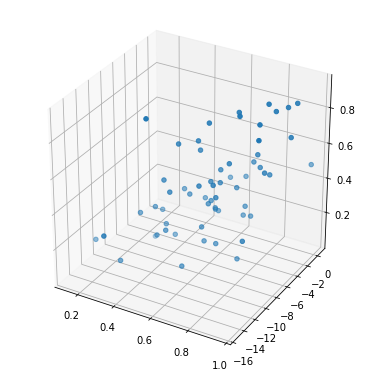

In [111]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)

ax.scatter(rhea_sriv[:, 1], rhea_sriv[:, 2], rhea_sriv[:, 5])

In [123]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(rhea_sriv)
(clustering.labels_[0:30])
print("Rhea:  " + str(collections.Counter(clustering.fit_predict(rhea))))
print("Sriv:  " + str(collections.Counter(clustering.fit_predict(sriv))))

Rhea:  Counter({1: 16, 0: 14})
Sriv:  Counter({0: 18, 1: 12})


In [124]:
clustering.n_connected_components_

1